
# Transfer Learning na YOLOv11 utilizando o dataset COCO

Este projeto visa aplicar o conceito de Aprendizado de Transferência na arquitetura YOLOv3 para a detecção de objetos. Utilizaremos o conjunto de dados COCO, que é um dos conjuntos de dados mais populares para detecção de objetos, contendo milhões de imagens com anotações de objetos.

A YOLOv3 é uma arquitetura de rede neural convolucional (CNN) que é conhecida por sua capacidade de detectar objetos em tempo real. Ela é capaz de identificar vários objetos em uma única imagem e é extremamente rápida, tornando-a ideal para aplicações em tempo real.

Tranfer Learning é uma técnica onde um modelo pré-treinado é usado como ponto de partida para um novo modelo. Neste projeto, utilizaremos as ponderações de uma YOLOv3 pré-treinada aplicada ao conjunto de dados COCO. Isso nos permite aproveitar o aprendizado anterior do modelo e aplicá-lo ao nosso novo problema, economizando tempo e recursos computacionais.

## Objetivo
Ao final deste projeto, busco um modelo capaz de detectar e identificar objetos com alta precisão e velocidade.

## Passos
- Pré-requisitos: Antes de começar, é necessário baixar o conjunto de dados de detecção COCO e instalar o pycocotools1.
- Configuração do Projeto: Inicialize o projeto e configure os seguintes componentes:
  - Configuração de Dados
  - Configuração do Modelo
  - Configuração de Perda e Métrica
  - Configuração do Otimizador
  - Configuração do Transformador
- Treinamento: Após a configuração, o próximo passo é treinar o modelo. O YOLOv3 é um algoritmo extremamente rápido de detecção de múltiplos objetos que usa uma rede neural convolucional (CNN) para detectar e identificar objetos.
- Transfer Learning: O aprendizado de transferência é aplicado no YOLOv3. Você pode inicializar todas as ponderações de um YOLOv3 pré-treinado (ou seja, a rede inteira treinada no COCO).
- Detecção de Objetos: Após o treinamento, o modelo pode ser usado para detectar objetos. Isso envolve várias etapas, como leitura de vídeo de entrada, passagem direta, obtenção de caixas delimitadoras, supressão não máxima e desenho de caixas delimitadoras com rótulos.

Espero que isso ajude a entender a abordagem geral do projeto. Se você tiver mais perguntas ou precisar de detalhes adicionais, fique à vontade para perguntar!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# YOLO (You Only Look Once)
Com o advento de carros autônomos, drones e outras tecnologias emergentes, a necessidade de sistemas de detecção de objetos em tempo real tornou-se cada vez mais crítica. É aqui que entra o YOLO (You Only Look Once).

YOLO é um sistema de detecção de objetos em tempo real que se destaca por sua incrível velocidade e precisão. Ao contrário dos métodos tradicionais de detecção de objetos que segmentam a imagem em várias regiões e executam a detecção em cada uma delas, YOLO aplica a detecção de objetos em uma única passagem, daí o nome “You Only Look Once”.

A arquitetura YOLO divide a imagem em uma grade e cada célula na grade é responsável por prever um número fixo de caixas delimitadoras. Cada caixa delimitadora é associada a uma pontuação de confiança e classificações de classe. A pontuação de confiança reflete a probabilidade de que a caixa delimitadora contenha um objeto e a precisão da caixa delimitadora. As classificações de classe indicam a probabilidade de o objeto pertencer a uma determinada classe.

YOLO possui várias versões, no entanto neste projeto estaremos utilizando a YOLOv11.


# COCO
O COCO é um conjunto de dados de detecção, segmentação e legendagem de objetos em larga escala. O COCO tem várias características, como por exemplo segmentação de objetos e reconhecimento em contexto.




# Setup de bibliotecas e recursos

In [1]:
pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 56.9 MB/s eta 0:00:00


In [2]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import kagglehub
import ultralytics

import warnings
warnings.filterwarnings("ignore")

import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import IPython.display as display
from PIL import Image
import cv2

from ultralytics import YOLO

from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!kaggle datasets download -d snehilsanyal/construction-site-safety-image-dataset-roboflow -p /content

Dataset URL: https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 204M/206M [00:10<00:00, 23.3MB/s]
100% 206M/206M [00:10<00:00, 20.6MB/s]


In [4]:
!unzip /content/construction-site-safety-image-dataset-roboflow.zip -d /content/kaggle/

Streaming output truncated to the last 5000 lines.
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.0a21e9e91348b61c6c1483d6884d2135.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3313bb2b19a7aa3a0af745abe858ec8e.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3bbcfef23f20b2cf747256793dcfc615.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.6cee1b67a21808fad2318593379f9986.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-25_jpg.rf.ddd7840e3d846cddfcc13d99f4a6999b.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-2_jpg.rf.4d46f38425296af74814d1f0506575b4.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-2_jpg.rf.58de1db8826e4221df63fd980b823844.jpg  
  inflating: /content/kaggle/css-data/train/images/IMG_3100_mp4-2_jpg.rf.87e69eb0f5f24cbadcca3fbfe8ca029c.jpg  
  inflating: /content/kaggle/css-data/train/imag

In [5]:
! wandb disabled

W&B disabled.


## CFG
A classe de configuração é responsável por organizar e centralizar as principais configurações do pipeline, incluindo:
- Modo de depuração (`DEBUG`): Controle para executar testes rápidos com frações menores do dataset.
- Dados e classes: Define as classes a serem detectadas e o número total delas.
- Treinamento: Configurações como número de épocas, tamanho do batch, modelo base (`yolov8s`), otimizador, taxa de aprendizado, regularizações, e parâmetros de early stopping.
- Caminhos: Diretórios de entrada e saída, como o local do dataset e a pasta para salvar resultados.

In [6]:
class CFG:
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 88

    # classes
    CLASSES = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask',
               'NO-Safety Vest', 'Person', 'Safety Cone',
               'Safety Vest', 'machinery', 'vehicle']
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # treinamento
    EPOCHS = 3 if DEBUG else 100
    BATCH_SIZE = 16

    BASE_MODEL = 'yolo11n'
    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'

    OPTIMIZER = 'auto' # SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    PROFILE = False
    LABEL_SMOOTHING = 0.0

    # caminhos
    CUSTOM_DATASET_DIR = '/content/kaggle/css-data/'
    OUTPUT_DIR = './'

In [7]:
dict_file = {
    'train': os.path.join(CFG.CUSTOM_DATASET_DIR, 'train'),
    'val': os.path.join(CFG.CUSTOM_DATASET_DIR, 'valid'),
    'test': os.path.join(CFG.CUSTOM_DATASET_DIR, 'test'),
    'nc': CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
    }

with open(os.path.join(CFG.OUTPUT_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [8]:
def read_yaml_file(file_path = CFG.CUSTOM_DATASET_DIR):
    with open(file_path, 'r') as file:
        try:
            data = yaml.safe_load(file)
            return data
        except yaml.YAMLError as e:
            print("Error reading YAML:", e)
            return None

def print_yaml_data(data):
    formatted_yaml = yaml.dump(data, default_style=False)
    print(formatted_yaml)

file_path = os.path.join(CFG.OUTPUT_DIR, 'data.yaml')
yaml_data = read_yaml_file(file_path)

if yaml_data:
    print_yaml_data(yaml_data)

names:
- Hardhat
- Mask
- NO-Hardhat
- NO-Mask
- NO-Safety Vest
- Person
- Safety Cone
- Safety Vest
- machinery
- vehicle
nc: 10
test: /content/kaggle/css-data/test
train: /content/kaggle/css-data/train
val: /content/kaggle/css-data/valid



# Análise exploratória dos dados

## Visualizando um exemplo único do dataset

In [11]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):
        image = image[..., ::-1]  # BGR para RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (640, 640, 3) 



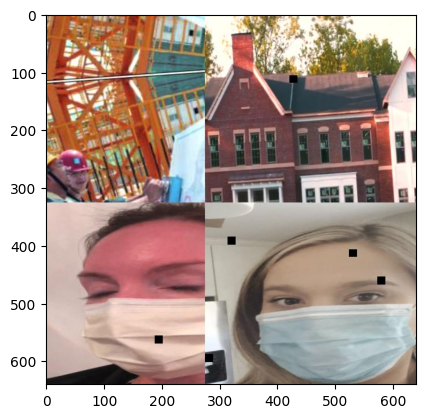

In [12]:
example_image_path = '/content/kaggle/css-data/train/images/-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg'
display_image(example_image_path, print_info = True, hide_axis = False)

## Visualizando múltiplos exemplos do dataset

In [13]:
def plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED):
    random.seed(seed)

    # Pega uma lista de imagens na pasta
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # Garente que existe pelo menos o num_images de imagens presentes na pasta
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the folder")

    # Seleciona algumas aleatoriamente
    selected_files = random.sample(image_files, num_images)

    # Cria um grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        img = Image.open(os.path.join(folder_path, file_name))

        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]

        ax.imshow(img)
        ax.axis('off')

    # Tira os sublots que ficaram vazios (depende do num_images)
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i % num_cols])
        else:
            fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.tight_layout()
    plt.show()

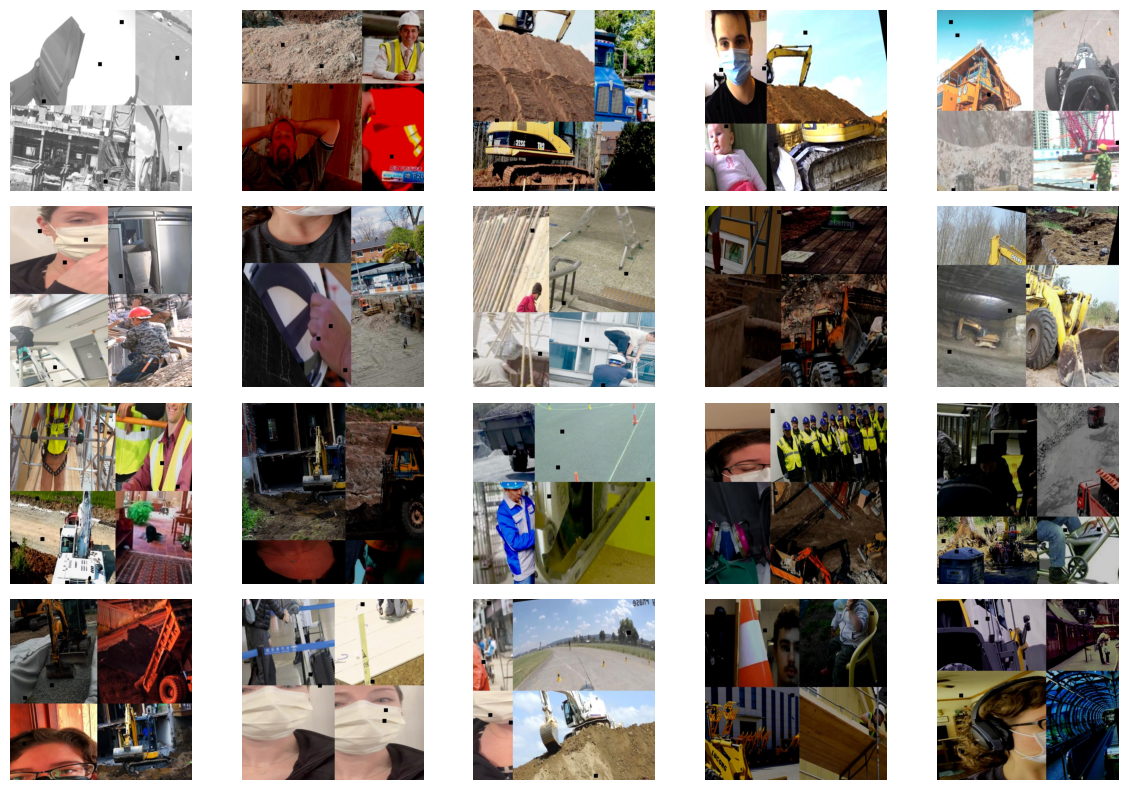

In [14]:
folder_path = CFG.CUSTOM_DATASET_DIR + 'train/images/'
plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED)

In [15]:
def get_image_properties(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Could not read image file")

    properties = {
        "width": img.shape[1],
        "height": img.shape[0],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
        "dtype": img.dtype,
    }

    return properties

## Análise de distribuição das classes

In [16]:
img_properties = get_image_properties(example_image_path)
img_properties

{'width': 640, 'height': 640, 'channels': 3, 'dtype': dtype('uint8')}

In [17]:
class_idx = {str(i): CFG.CLASSES[i] for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

class_stat = {}
data_len = {}
class_info = []

for mode in ['train', 'valid', 'test']:
    class_count = {CFG.CLASSES[i]: 0 for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

    path = os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'labels')

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

    class_info.append({'Mode': mode, **class_count, 'Data_Volume': data_len[mode]})

dataset_stats_df = pd.DataFrame(class_info)
dataset_stats_df

Mode  Hardhat  Mask  NO-Hardhat  NO-Mask  NO-Safety Vest  Person  \
0  train     1314  1096        1380     1531            1864    2526   
1  valid       42    19          37       44              56      84   
2   test       30    16          25       30              36      59   

   Safety Cone  Safety Vest  machinery  vehicle  Data_Volume  
0          631         1319       2101      744         2605  
1           13           28         26       16          114  
2            8           22         22       15           82

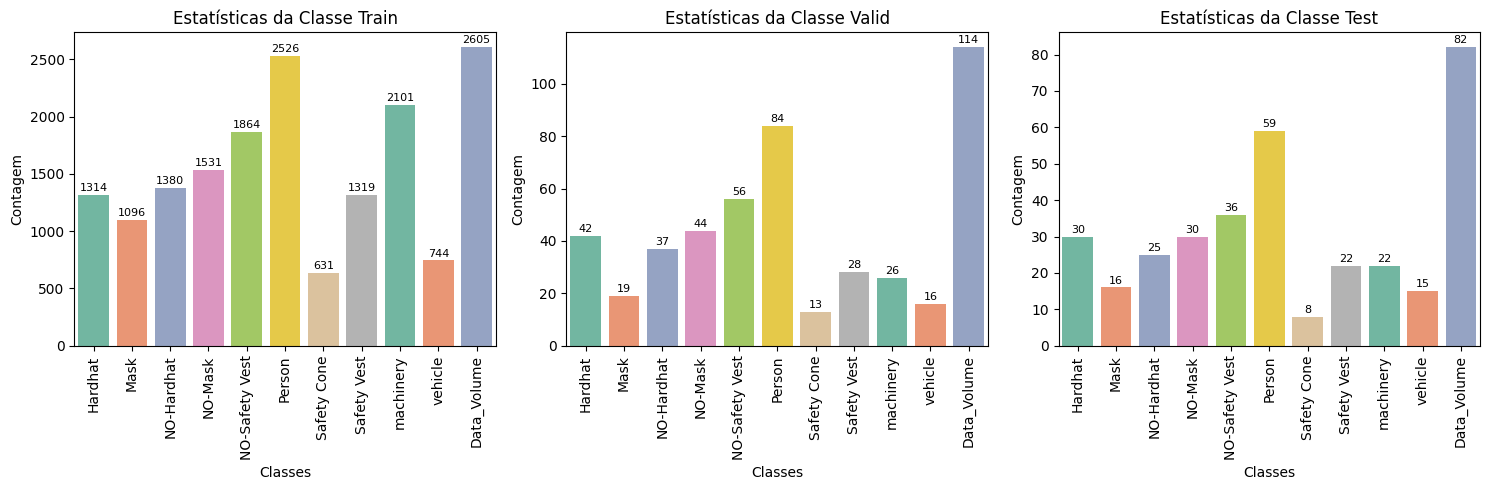

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plots de barras verticais para cada modalidade (train, valid, test)
for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(
        data=dataset_stats_df[dataset_stats_df['Mode'] == mode].drop(columns='Mode'),
        orient='v',
        ax=axes[i],
        palette='Set2'
    )

    axes[i].set_title(f'Estatísticas da Classe {mode.capitalize()}')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=90)

    # Anotação da contagem em cima de cada barra
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

In [19]:
# Checando formato das imagens em cada dataset
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:')

    img_size = 0
    for file in glob.glob(os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'images', '*')):

        image = Image.open(file)

        if image.size != img_size:
            print(f'{image.size}')
            img_size = image.size


Image sizes in train set:
(640, 640)

Image sizes in valid set:
(640, 640)

Image sizes in test set:
(640, 640)


# Teste de baseline do modelo

A baseline do modelo yolo11n será feita analisando suas predições no dataset de teste.

No entanto, é extremamente necessário notar que o modelo que estamos utilizando nunca foi treinado para classificar imagens de itens de segurança pessoal, portanto seria descabido pensar que a rede pudesse inferir tal tipo de objeto.

Para efeitos práticos, vamos testar numa imagem e ver o que o modelo nos retorna.

In [22]:
print(CFG.BASE_MODEL_WEIGHTS)
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

yolo11n.pt


In [25]:
# Fazendo a predição numa única imagem
results = model.predict(
    source = example_image_path,

    classes = [0],
    conf = 0.30,
    device = [0], # inference with dual GPU
    imgsz = (img_properties['height'], img_properties['width']),

    save = True,
    save_txt = True,
    save_conf = True,
    exist_ok = True,
)


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
image 1/1 /content/kaggle/css-data/train/images/-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg: 640x640 2 persons, 11.4ms
Speed: 5.6ms preprocess, 11.4ms inference, 845.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (640, 640, 3) 



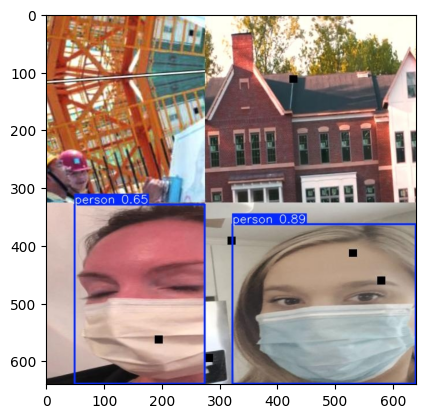

In [26]:
example_image_inference_output = example_image_path.split('/')[-1]
display_image(f'/content/runs/detect/predict/{example_image_inference_output}')

O modelo é capaz de inferir razoavelmente bem quando há pessoas numa foto, mas na foto onde há pessoas usando capacete por exemplo não performou, como esperado.

# Fine-tuning (ajuste fino) do modelo


Em tarefas de computação visual, especialmente ao lidar com grandes conjuntos de dados, o treinamento de modelos de redes neurais profundas pode ser extremamente dispendioso em termos de tempo e recursos computacionais. Para resolver esse problema e acelerar o processo de treinamento, uma abordagem amplamente utilizada é o **fine-tuning**.

O **fine-tuning** envolve pegar um modelo que foi previamente treinado em um grande conjunto de dados (geralmente em uma tarefa genérica, como detecção de objetos em imagens ou classificação de imagens) e ajustá-lo para uma tarefa específica ou um novo conjunto de dados. Ao utilizar um modelo pré-treinado, geralmente não é necessário treinar o modelo desde o início, o que economiza tempo e recursos, além de aproveitar o conhecimento adquirido durante o treinamento prévio.

O principal objetivo do fine-tuning é adaptar um modelo já treinado para um novo domínio, onde as características do conjunto de dados podem ser semelhantes, mas não idênticas, ao conjunto original. Em um cenário de **fine-tuning**, a maioria das camadas da rede neural, especialmente aquelas responsáveis pela extração de características de baixo nível (como bordas e texturas), são mantidas, uma vez que são bastante gerais e aplicáveis a muitos tipos de imagens. As camadas mais profundas, que são responsáveis pela tomada de decisão final (como as camadas de classificação ou detecção), são ajustadas para aprender a distinguir os novos conceitos ou classes presentes no conjunto de dados específico.

Em modelos como o **YOLO**, o **fine-tuning** é uma estratégia comum. Em vez de treinar um modelo YOLO completamente do zero, que pode ser extremamente demorado e exigir um grande volume de dados, usamos pesos pré-treinados de modelos como o **YOLOv11**, que foram treinados em vastos conjuntos de dados como COCO ou ImageNet. Esses modelos pré-treinados já possuem uma boa capacidade de generalização e, ao ajustar suas camadas, podemos adaptá-los rapidamente para a tarefa específica em questão, como, por exemplo o cenário do presente projeto, detectar equipamentos de proteção individual (EPIs) em imagens de construções.

In [27]:
print('Model: ', CFG.BASE_MODEL_WEIGHTS)
print('Epochs: ', CFG.EPOCHS)
print('Batch: ', CFG.BATCH_SIZE)

Model:  yolo11n.pt
Epochs:  100
Batch:  16


In [28]:
# Vai demorar um bucado
model.train(
  data = os.path.join(CFG.OUTPUT_DIR, 'data.yaml'),

  task = 'detect',

  imgsz = (img_properties['height'], img_properties['width']),

  epochs = CFG.EPOCHS,
  batch = CFG.BATCH_SIZE,
  optimizer = CFG.OPTIMIZER,
  lr0 = CFG.LR,
  lrf = CFG.LR_FACTOR,
  weight_decay = CFG.WEIGHT_DECAY,
  dropout = CFG.DROPOUT,
  fraction = CFG.FRACTION,
  patience = CFG.PATIENCE,
  profile = CFG.PROFILE,
  label_smoothing = CFG.LABEL_SMOOTHING,

  name = f'{CFG.BASE_MODEL}_{CFG.EXP_NAME}',
  seed = CFG.SEED,

  val = True,
  amp = True,
  exist_ok = True,
  resume = False,
  device = 0,
  verbose = False,
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=(640, 640), save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolo11n_ppe_css_100_epochs, exist_ok=True, pretrained=True, optimizer=auto, verbose=False, seed=88, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/kaggle/css-data/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:02<00:00, 1142.32it/s]

train: WARNING ⚠️ /content/kaggle/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/kaggle/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
train: New cache created: /content/kaggle/css-data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/kaggle/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1033.04it/s]

val: New cache created: /content/kaggle/css-data/valid/labels.cache


Plotting labels to runs/detect/yolo11n_ppe_css_100_epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolo11n_ppe_css_100_epochs
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.8G      1.409      3.193      1.482        295        640: 100%|██████████| 163/163 [00:21<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        114        697      0.467      0.311       0.32      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.53G       1.34       1.98      1.453        314        640: 100%|██████████| 163/163 [00:19<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        114        697       0.54      0.455      0.458      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.64G      1.272      1.712      1.416        235        640: 100%|██████████| 163/163 [00:18<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.33it/s]

                   all        114        697       0.66      0.443      0.504      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.31G       1.24      1.605      1.393        283        640: 100%|██████████| 163/163 [00:18<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]

                   all        114        697      0.685      0.486      0.525      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.08G      1.219      1.523      1.369        279        640: 100%|██████████| 163/163 [00:18<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]

                   all        114        697      0.643      0.519      0.561      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       3.5G      1.191      1.473      1.353        267        640: 100%|██████████| 163/163 [00:18<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        114        697      0.705      0.519       0.58      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.93G      1.182      1.414      1.334        293        640: 100%|██████████| 163/163 [00:18<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]

                   all        114        697      0.685       0.53      0.593      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.34G      1.158      1.355      1.319        205        640: 100%|██████████| 163/163 [00:18<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.67it/s]

                   all        114        697      0.652      0.541      0.569      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.21G      1.149      1.335      1.314        271        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.38it/s]

                   all        114        697      0.756      0.564      0.624      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.56G      1.131      1.294      1.303        305        640: 100%|██████████| 163/163 [00:18<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all        114        697      0.747      0.527      0.617      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.18G      1.128      1.263      1.299        296        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]

                   all        114        697      0.779      0.541       0.61      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.47G      1.106       1.23      1.285        202        640: 100%|██████████| 163/163 [00:18<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all        114        697       0.73       0.58      0.635      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.66G      1.108      1.203      1.275        233        640: 100%|██████████| 163/163 [00:18<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]

                   all        114        697      0.731      0.533      0.606      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       3.8G      1.086      1.179      1.262        294        640: 100%|██████████| 163/163 [00:18<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.39it/s]

                   all        114        697      0.756      0.567      0.641      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.11G      1.089      1.148      1.263        227        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.06it/s]

                   all        114        697      0.792       0.56      0.645      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.75G      1.084      1.136      1.259        285        640: 100%|██████████| 163/163 [00:18<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.74it/s]

                   all        114        697      0.824      0.596      0.673      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.47G      1.057      1.113      1.247        204        640: 100%|██████████| 163/163 [00:18<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.74it/s]

                   all        114        697      0.739      0.595      0.649      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       3.2G      1.059      1.114      1.253        294        640: 100%|██████████| 163/163 [00:18<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]

                   all        114        697      0.818      0.553      0.651      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.68G      1.066      1.091      1.239        310        640: 100%|██████████| 163/163 [00:18<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.20it/s]

                   all        114        697      0.759      0.593      0.662       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.64G       1.04      1.074      1.233        347        640: 100%|██████████| 163/163 [00:17<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.34it/s]

                   all        114        697      0.822       0.61       0.69      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.31G      1.049      1.062      1.233        277        640: 100%|██████████| 163/163 [00:17<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]

                   all        114        697      0.781      0.615      0.669      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.18G      1.019      1.031      1.218        189        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all        114        697      0.747      0.617      0.665       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.36G      1.029      1.022       1.22        197        640: 100%|██████████| 163/163 [00:18<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]

                   all        114        697      0.797      0.597      0.673      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.3G      1.031      1.024      1.218        249        640: 100%|██████████| 163/163 [00:18<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]

                   all        114        697      0.816      0.628      0.699      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.59G      1.014      1.013      1.211        257        640: 100%|██████████| 163/163 [00:18<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        114        697      0.762       0.62      0.677      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.45G      1.014     0.9909      1.203        287        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.38it/s]

                   all        114        697      0.784      0.623       0.67      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.14G      1.012     0.9925      1.205        310        640: 100%|██████████| 163/163 [00:18<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all        114        697       0.77      0.616      0.686      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.1G      1.008     0.9825      1.203        230        640: 100%|██████████| 163/163 [00:18<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all        114        697      0.762      0.667      0.716      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.84G     0.9936     0.9711      1.195        258        640: 100%|██████████| 163/163 [00:18<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.25it/s]

                   all        114        697      0.773      0.649      0.707      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.63G     0.9862     0.9585       1.19        351        640: 100%|██████████| 163/163 [00:18<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.39it/s]

                   all        114        697      0.813      0.607      0.697      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.09G     0.9818     0.9483       1.19        244        640: 100%|██████████| 163/163 [00:17<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]

                   all        114        697      0.827      0.622      0.704      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.82G     0.9709      0.924      1.182        283        640: 100%|██████████| 163/163 [00:17<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.05it/s]

                   all        114        697      0.838      0.636      0.712       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.28G     0.9691     0.9155      1.178        237        640: 100%|██████████| 163/163 [00:18<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.22it/s]

                   all        114        697      0.804      0.668      0.724      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.34G     0.9724     0.9235      1.178        200        640: 100%|██████████| 163/163 [00:18<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.16it/s]

                   all        114        697       0.82      0.647      0.709      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.11G     0.9561     0.9211      1.178        284        640: 100%|██████████| 163/163 [00:17<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]

                   all        114        697      0.829      0.655      0.728      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.69G     0.9736     0.9062       1.17        354        640: 100%|██████████| 163/163 [00:18<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.14it/s]

                   all        114        697      0.853      0.654       0.73      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.39G     0.9563      0.895      1.165        345        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.31it/s]

                   all        114        697      0.885       0.65      0.744      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.22G     0.9456     0.8795       1.16        355        640: 100%|██████████| 163/163 [00:18<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.38it/s]

                   all        114        697      0.868      0.679      0.751      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.41G     0.9461     0.8727      1.159        250        640: 100%|██████████| 163/163 [00:18<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all        114        697      0.845      0.632      0.722      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.62G     0.9413     0.8732      1.158        231        640: 100%|██████████| 163/163 [00:18<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]

                   all        114        697      0.837      0.664      0.745      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.68G     0.9404     0.8643      1.155        221        640: 100%|██████████| 163/163 [00:18<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.35it/s]

                   all        114        697      0.827      0.687      0.748      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.85G     0.9301     0.8597      1.152        221        640: 100%|██████████| 163/163 [00:18<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.27it/s]

                   all        114        697      0.822      0.673      0.756       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.5G     0.9312     0.8491      1.148        250        640: 100%|██████████| 163/163 [00:18<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all        114        697      0.815      0.684      0.749      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.14G     0.9306     0.8559      1.148        280        640: 100%|██████████| 163/163 [00:18<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all        114        697      0.843      0.673      0.745       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.07G     0.9264     0.8397      1.143        270        640: 100%|██████████| 163/163 [00:18<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.23it/s]

                   all        114        697      0.823      0.694      0.756      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.21G     0.9048     0.8268      1.138        300        640: 100%|██████████| 163/163 [00:18<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.31it/s]

                   all        114        697      0.866      0.648      0.753      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.45G     0.9119     0.8291      1.139        309        640: 100%|██████████| 163/163 [00:18<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.45it/s]

                   all        114        697      0.876      0.675      0.773      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.33G     0.9075     0.8242      1.137        326        640: 100%|██████████| 163/163 [00:18<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]

                   all        114        697      0.876      0.672      0.755      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.96G     0.9022     0.8146      1.133        314        640: 100%|██████████| 163/163 [00:18<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all        114        697      0.867      0.669      0.763       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.12G     0.9002     0.8156      1.131        316        640: 100%|██████████| 163/163 [00:18<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.32it/s]

                   all        114        697      0.873       0.68      0.758      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.32G        0.9     0.8033      1.126        293        640: 100%|██████████| 163/163 [00:18<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]

                   all        114        697      0.875      0.692      0.775       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.27G     0.8908      0.795      1.124        274        640: 100%|██████████| 163/163 [00:18<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.05it/s]

                   all        114        697      0.849      0.683       0.76      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.4G      0.894     0.7968       1.13        352        640: 100%|██████████| 163/163 [00:18<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]

                   all        114        697      0.881      0.687      0.771      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.39G     0.8949     0.7829      1.126        278        640: 100%|██████████| 163/163 [00:18<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.35it/s]

                   all        114        697       0.86      0.702      0.772      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.05G      0.887     0.7819      1.122        309        640: 100%|██████████| 163/163 [00:18<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.74it/s]

                   all        114        697      0.869      0.677       0.76      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.32G     0.8824     0.7809      1.118        291        640: 100%|██████████| 163/163 [00:18<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.12it/s]

                   all        114        697      0.881      0.683      0.775      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.16G      0.868     0.7712      1.114        282        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        114        697       0.88      0.699      0.781      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.61G     0.8732     0.7781      1.114        225        640: 100%|██████████| 163/163 [00:18<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all        114        697      0.896      0.685      0.773      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.66G     0.8769     0.7663      1.114        501        640: 100%|██████████| 163/163 [00:17<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]

                   all        114        697      0.858        0.7      0.783      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.55G      0.871     0.7633      1.114        233        640: 100%|██████████| 163/163 [00:17<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]

                   all        114        697      0.873      0.719      0.785       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.39G     0.8566     0.7534      1.106        168        640: 100%|██████████| 163/163 [00:18<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all        114        697      0.842      0.724      0.779      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.71G     0.8674     0.7547      1.109        314        640: 100%|██████████| 163/163 [00:18<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]

                   all        114        697      0.855      0.728      0.784       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.89G     0.8634     0.7514      1.105        260        640: 100%|██████████| 163/163 [00:18<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]

                   all        114        697      0.873      0.716      0.783       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.57G     0.8526      0.741      1.101        194        640: 100%|██████████| 163/163 [00:18<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]

                   all        114        697      0.844      0.715       0.78      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.72G     0.8491     0.7353      1.096        388        640: 100%|██████████| 163/163 [00:18<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.27it/s]

                   all        114        697      0.846      0.725      0.779      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       3.3G     0.8435     0.7292      1.097        220        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.13it/s]

                   all        114        697      0.844      0.728      0.782       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.39G      0.849     0.7365      1.098        235        640: 100%|██████████| 163/163 [00:17<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]

                   all        114        697      0.882      0.726      0.797      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.77G     0.8443     0.7345      1.097        349        640: 100%|██████████| 163/163 [00:18<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]

                   all        114        697      0.876      0.733      0.799       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.81G     0.8434     0.7275       1.09        411        640: 100%|██████████| 163/163 [00:18<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.08it/s]

                   all        114        697      0.849      0.731      0.783      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.43G     0.8338     0.7207       1.09        229        640: 100%|██████████| 163/163 [00:18<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.41it/s]

                   all        114        697      0.887      0.709      0.787      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.49G     0.8296     0.7151      1.087        246        640: 100%|██████████| 163/163 [00:17<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.19it/s]

                   all        114        697      0.893      0.713       0.79      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.12G      0.834     0.7091      1.087        420        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]

                   all        114        697      0.886      0.722      0.785      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.71G     0.8192     0.7151      1.084        221        640: 100%|██████████| 163/163 [00:18<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.34it/s]

                   all        114        697      0.911      0.708      0.792      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.55G     0.8316     0.7083      1.085        336        640: 100%|██████████| 163/163 [00:18<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.32it/s]

                   all        114        697      0.923      0.692       0.79      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.59G     0.8161     0.6972      1.075        352        640: 100%|██████████| 163/163 [00:18<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.33it/s]

                   all        114        697        0.9      0.712      0.789      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       3.8G     0.8108     0.6954      1.077        261        640: 100%|██████████| 163/163 [00:18<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]

                   all        114        697      0.914      0.719      0.794        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.64G     0.8108     0.6918      1.074        327        640: 100%|██████████| 163/163 [00:18<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]

                   all        114        697      0.904      0.717      0.796      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.17G     0.8163     0.6907      1.078        202        640: 100%|██████████| 163/163 [00:18<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]

                   all        114        697      0.919      0.713      0.793      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.43G     0.8155     0.6911      1.075        366        640: 100%|██████████| 163/163 [00:18<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.50it/s]

                   all        114        697      0.857      0.748      0.799      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.71G     0.8018     0.6799      1.074        318        640: 100%|██████████| 163/163 [00:18<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]

                   all        114        697      0.887       0.72      0.795      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.57G     0.7966     0.6825      1.071        410        640: 100%|██████████| 163/163 [00:18<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all        114        697      0.879      0.744      0.798       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.19G     0.7975     0.6787      1.068        187        640: 100%|██████████| 163/163 [00:17<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]

                   all        114        697      0.889      0.734      0.803      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.27G     0.7928     0.6764       1.07        333        640: 100%|██████████| 163/163 [00:18<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.82it/s]

                   all        114        697      0.881      0.743      0.803      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.33G     0.7972     0.6746      1.067        258        640: 100%|██████████| 163/163 [00:18<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]

                   all        114        697      0.881      0.733      0.795      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.39G     0.7889     0.6682      1.063        265        640: 100%|██████████| 163/163 [00:18<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.16it/s]

                   all        114        697      0.905       0.74      0.804      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.99G      0.791     0.6601      1.058        326        640: 100%|██████████| 163/163 [00:18<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.16it/s]

                   all        114        697      0.904      0.734      0.817      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.21G     0.7942     0.6639      1.066        316        640: 100%|██████████| 163/163 [00:18<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.39it/s]

                   all        114        697      0.903      0.727       0.81      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.54G     0.7836     0.6581      1.059        249        640: 100%|██████████| 163/163 [00:18<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all        114        697      0.934      0.723      0.809      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.88G     0.7813     0.6569      1.055        187        640: 100%|██████████| 163/163 [00:18<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]

                   all        114        697      0.875      0.757       0.82       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.47G     0.7768      0.655      1.058        248        640: 100%|██████████| 163/163 [00:18<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]

                   all        114        697       0.92      0.726      0.812      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.9G     0.7885     0.5905      1.058        115        640: 100%|██████████| 163/163 [00:18<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.20it/s]

                   all        114        697      0.908      0.719        0.8      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.02G     0.7634     0.5638      1.042        171        640: 100%|██████████| 163/163 [00:18<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.53it/s]

                   all        114        697      0.904      0.703      0.803      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.02G     0.7586     0.5541      1.041        224        640: 100%|██████████| 163/163 [00:17<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all        114        697      0.913      0.717      0.807       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.32G     0.7523     0.5493      1.038        171        640: 100%|██████████| 163/163 [00:17<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]

                   all        114        697      0.904      0.741      0.808      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.02G     0.7453     0.5437      1.032        198        640: 100%|██████████| 163/163 [00:17<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]

                   all        114        697      0.893      0.741       0.81      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.14G     0.7453     0.5441      1.034        202        640: 100%|██████████| 163/163 [00:17<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.12it/s]

                   all        114        697      0.913      0.734      0.816      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.98G     0.7374     0.5427      1.028        161        640: 100%|██████████| 163/163 [00:17<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]

                   all        114        697      0.915      0.732      0.807      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.15G     0.7351     0.5399      1.029        172        640: 100%|██████████| 163/163 [00:17<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.52it/s]

                   all        114        697      0.927      0.728      0.811      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.88G      0.735     0.5336      1.024        122        640: 100%|██████████| 163/163 [00:17<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.38it/s]

                   all        114        697      0.913       0.73      0.812      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.8G     0.7313     0.5336      1.025        151        640: 100%|██████████| 163/163 [00:17<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.36it/s]

                   all        114        697       0.91      0.736      0.813      0.512



100 epochs completed in 0.540 hours.
Optimizer stripped from runs/detect/yolo11n_ppe_css_100_epochs/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


                   all        114        697      0.877      0.756      0.819       0.52
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/yolo11n_ppe_css_100_epochs


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eff5b9e4490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

# Exportando e avaliando resultado de treino

O modelo já pode ser encontrado em:

```
runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt
```
No entanto, também pode-se exportar o modelo parar o formato .onnx `(Open Neural Network Exchange)` que é compatível com múltiplas plataformas (TensorFlow, PyTorch, etc).


In [29]:
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = (img_properties['height'], img_properties['width']),
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/yolo11n_ppe_css_100_epochs/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (5.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 119.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: export success ✅ 6.0s, saved as 'runs/detect/yolo11n_ppe_css_100_epochs/weights/best.onnx' (10.1 MB)

Export complete (7.6s)
Results saved to /content/runs/detect/yolo11n_ppe_css_100_epochs/weights
Predict:         yolo predict task=detect model=runs/detect/yolo11n_ppe_css_100_epochs/wei

'runs/detect/yolo11n_ppe_css_100_epochs/weights/best.onnx'

In [30]:
results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'batch' not in i
]

results_paths

['./runs/detect/yolo11n_ppe_css_100_epochs/R_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/PR_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix_normalized.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/F1_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/P_curve.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/results.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix.png',
 './runs/detect/yolo11n_ppe_css_100_epochs/labels.jpg',
 './runs/detect/yolo11n_ppe_css_100_epochs/labels_correlogram.jpg']

./runs/detect/yolo11n_ppe_css_100_epochs/F1_curve.png


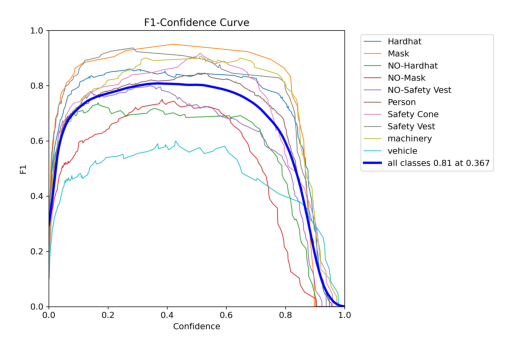



./runs/detect/yolo11n_ppe_css_100_epochs/PR_curve.png


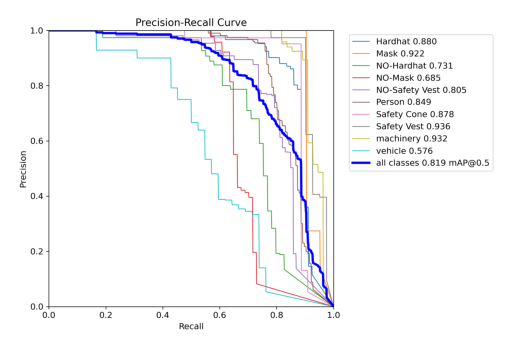



./runs/detect/yolo11n_ppe_css_100_epochs/P_curve.png


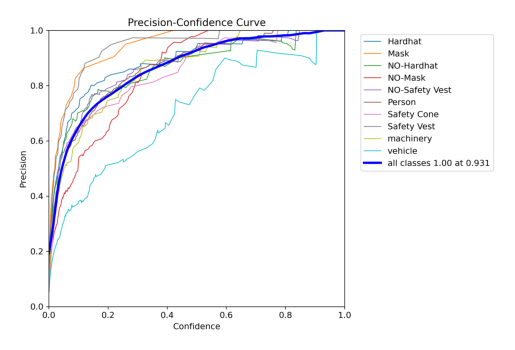



./runs/detect/yolo11n_ppe_css_100_epochs/R_curve.png


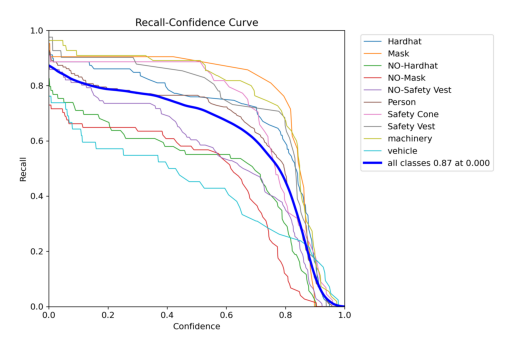



./runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix.png


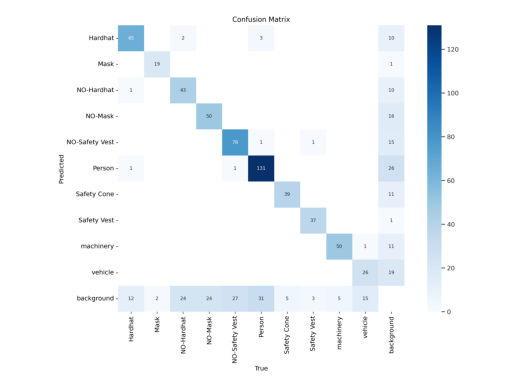



./runs/detect/yolo11n_ppe_css_100_epochs/confusion_matrix_normalized.png


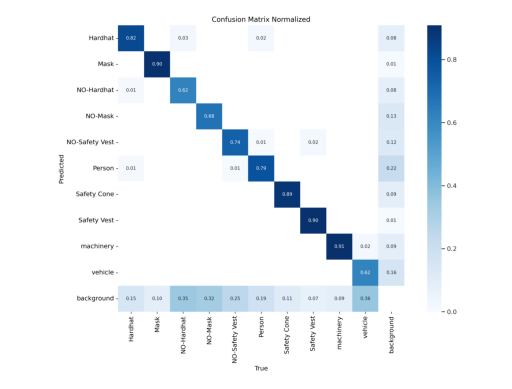



./runs/detect/yolo11n_ppe_css_100_epochs/labels.jpg


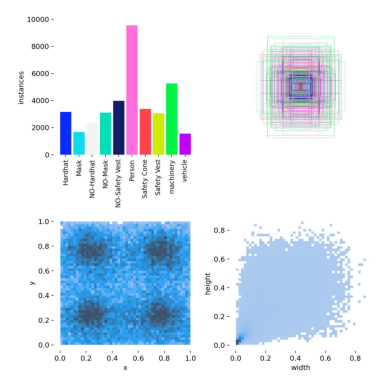



./runs/detect/yolo11n_ppe_css_100_epochs/labels_correlogram.jpg


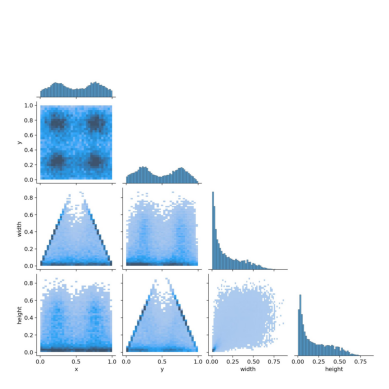



./runs/detect/yolo11n_ppe_css_100_epochs/results.png


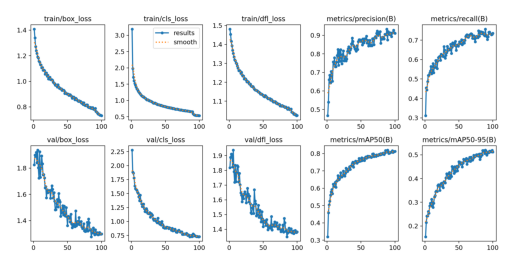

In [31]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

## Loss

A função de loss dos treinamentos em redes YOLO consistem em 3 componentes principais: box loss, class loss e dfl loss.

A box loss é como um árbitro que avalia o quão preciso está o modelo na localização de objetos dentro de uma imagem. Imagine que o modelo precisa desenhar um quadrado exatamente em volta de um objeto - por exemplo, em volta de um capacete em uma imagem de construção. A box loss mede o quanto esse quadrado desenhado pelo modelo se aproxima ou se afasta do quadrado real onde o objeto está localizado. Quanto menor for essa distância, mais preciso o modelo está sendo na localização do objeto.

A classification loss, ou cls loss, funciona como um professor rigoroso que verifica se o aluno identificou corretamente o que é cada objeto. Continuando no exemplo do capacete, essa loss checa se quando o modelo identifica um objeto dentro daquela caixa delimitadora, ele realmente está classificando como "Capacete" e não como "Pessoa" ou "Máquina". É como um teste de múltipla escolha onde o modelo precisa acertar exatamente a classe do objeto.

Já a distribution focal loss, ou DFL loss, é um pouco mais sofisticada. Pense nela como um refinador de precisão. Não basta apenas localizar o objeto e identificar sua classe, é preciso ter certeza da qualidade dessa predição. A DFL loss trabalha nos detalhes, olhando para a distribuição das probabilidades de predição. Ela ajuda o modelo a ser mais confiante quando está realmente certo e mais cauteloso quando há ambiguidade. É como um especialista que não só diz o que é o objeto, mas também o quão seguro está dessa identificação.

Essas três losses trabalham juntas como uma equipe de avaliação, cada uma focando em um aspecto diferente da detecção de objetos: localização, classificação e confiança na predição. O objetivo final é treinar o modelo para ser o mais preciso possível em identificar e localizar objetos em imagens.

In [32]:
df = pd.read_csv(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{CFG.OUTPUT_DIR}training_log_df.csv', index=False)
df

epoch       time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1    28.2031         1.40881         3.19347         1.48164   
1       2    48.7369         1.34043         1.97976         1.45336   
2       3    68.3106         1.27157         1.71164         1.41622   
3       4    87.7021         1.24006         1.60495         1.39305   
4       5   107.3000         1.21881         1.52251         1.36919   
..    ...        ...             ...             ...             ...   
95     96  1868.0000         0.74526         0.54411         1.03392   
96     97  1887.0800         0.73736         0.54266         1.02828   
97     98  1906.0600         0.73506         0.53989         1.02919   
98     99  1925.0700         0.73501         0.53365         1.02353   
99    100  1944.0100         0.73132         0.53361         1.02463   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.46672            0.31130           0.32009   
1                0.53993            0.45463           0.45829   
2                0.66041            0.44347           0.50379   
3                0.68540            0.48643           0.52524   
4                0.64318            0.51900           0.56093   
..                   ...                ...               ...   
95               0.91292            0.73375           0.81597   
96               0.91470            0.73233           0.80724   
97               0.92747            0.72832           0.81105   
98               0.91330            0.72954           0.81177   
99               0.91040            0.73559           0.81251   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0               0.15451       1.82556       2.27676       1.81729  0.000237   
1               0.21468       1.89851       1.88467       1.88752  0.000470   
2               0.24151       1.88908       1.86389       1.90997  0.000698   
3               0.24293       1.91888       1.77787       1.90493  0.000693   
4               0.26064       1.84054       1.63450       1.82327  0.000686   
..                  ...           ...           ...           ...       ...   
95              0.51541       1.29356       0.72992       1.37779  0.000042   
96              0.51269       1.30928       0.73087       1.39342  0.000035   
97              0.51306       1.29935       0.72916       1.38007  0.000028   
98              0.51885       1.29607       0.72575       1.37925  0.000021   
99              0.51186       1.29861       0.72731       1.38261  0.000014   

      lr/pg1    lr/pg2  
0   0.000237  0.000237  
1   0.000470  0.000470  
2   0.000698  0.000698  
3   0.000693  0.000693  
4   0.000686  0.000686  
..       ...       ...  
95  0.000042  0.000042  
96  0.000035  0.000035  
97  0.000028  0.000028  
98  0.000021  0.000021  
99  0.000014  0.000014  

[100 rows x 15 columns]

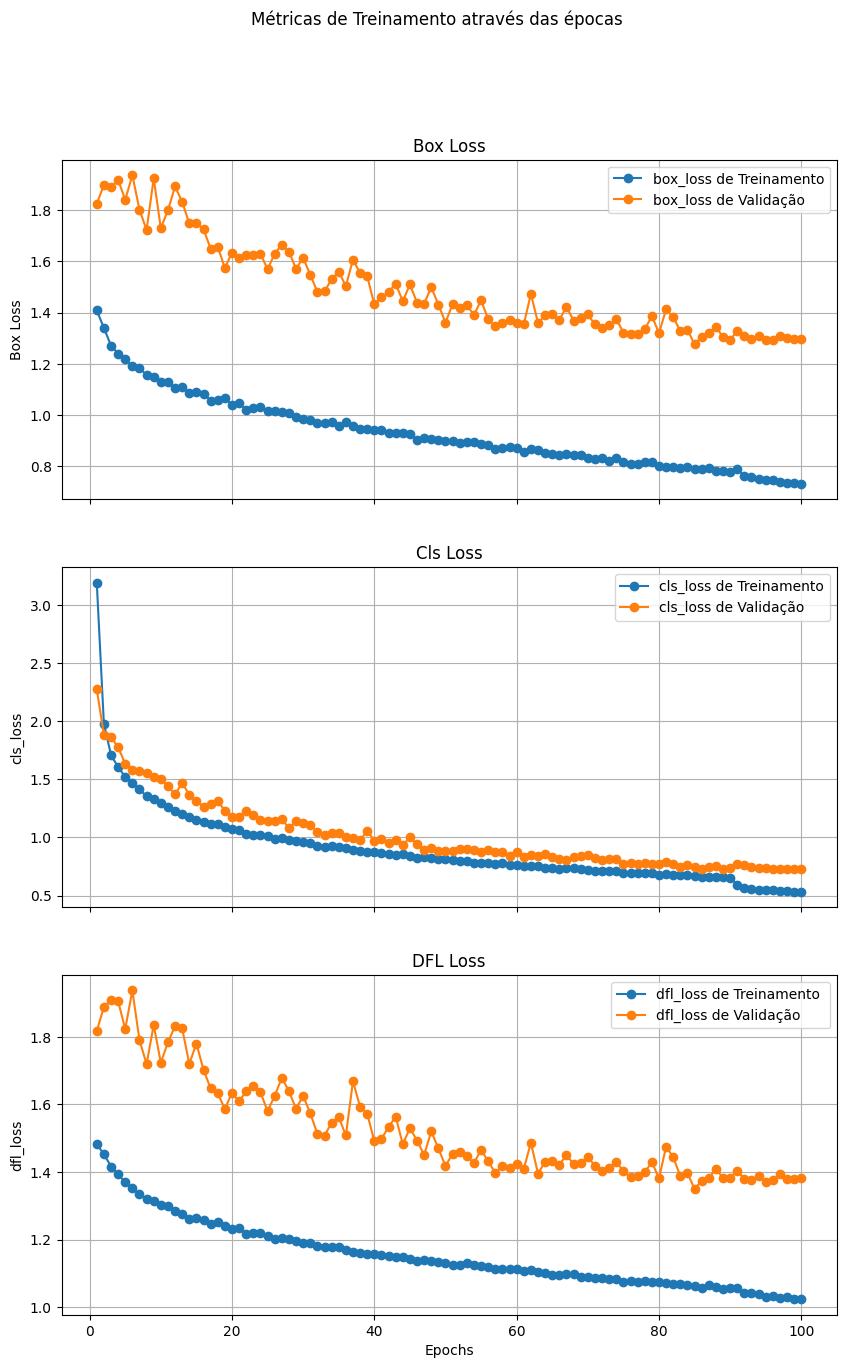

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

ax1.set_title('Box Loss')
ax1.plot(df['epoch'], df['train/box_loss'], label='box_loss de Treinamento', marker='o', linestyle='-')
ax1.plot(df['epoch'], df['val/box_loss'], label='box_loss de Validação', marker='o', linestyle='-')
ax1.set_ylabel('Box Loss')
ax1.legend()
ax1.grid(True)

# cls_loss de Treinamento e Validação
ax2.set_title('Cls Loss')
ax2.plot(df['epoch'], df['train/cls_loss'], label='cls_loss de Treinamento', marker='o', linestyle='-')
ax2.plot(df['epoch'], df['val/cls_loss'], label='cls_loss de Validação ', marker='o', linestyle='-')
ax2.set_ylabel('cls_loss')
ax2.legend()
ax2.grid(True)

# dfl_loss de Treinamento e Validação
ax3.set_title('DFL Loss')
ax3.plot(df['epoch'], df['train/dfl_loss'], label='dfl_loss de Treinamento ', marker='o', linestyle='-')
ax3.plot(df['epoch'], df['val/dfl_loss'], label='dfl_loss de Validação ', marker='o', linestyle='-')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('dfl_loss')
ax3.legend()
ax3.grid(True)

plt.suptitle('Métricas de Treinamento através das épocas')
plt.show()

In [34]:
validation_results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)

6

./runs/detect/yolo11n_ppe_css_100_epochs/val_batch1_pred.jpg


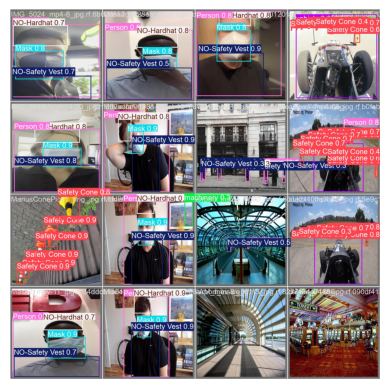

In [35]:
# Checando predições para um conjunto aleatório de validação
if len(validation_results_paths) >= 1:
    val_img_path = random.choice(validation_results_paths)
    print(val_img_path)
    display_image(val_img_path, print_info = False, hide_axis = True)